In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.3 MB/s 
     |████████████████████████████████| 346 kB 49.2 MB/s 
     |████████████████████████████████| 197 kB 74.4 MB/s 
     |████████████████████████████████| 4.2 MB 45.6 MB/s 
     |████████████████████████████████| 1.2 MB 52.7 MB/s 
     |████████████████████████████████| 59 kB 6.5 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 212 kB 74.0 MB/s 
     |████████████████████████████████| 140 kB 70.3 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
     |████████████████████████████████| 1.1 MB 61.4 MB/s 
     |████████████████████████████████| 596 kB 73.9 MB/s 
     |████████████████████████████████| 127 kB 69.0 MB/s 
     |████████████████████████████████| 271 kB 72.1 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
     |████████████████████████████████| 144 kB 55.5 MB/s 
     |████████████████████████████████| 6.6 MB 55.3 MB/s 
ERROR: pip's dependency

In [2]:
#hide
from fastbook import *

# First try

In [ ]:
# using duckduckgo api to download images #
urls = search_images_ddg('cornrows men black', max_images=100)
len(urls),urls[0]

(100,
 'https://i2.wp.com/therighthairstyles.com/wp-content/uploads/2014/05/3-cornrow-design-for-black-men.jpg?resize=974%2C974&ssl=1')

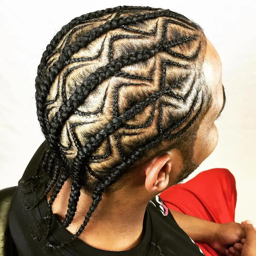

In [ ]:
# displaying a downloaded image #
download_url(urls[0], 'images/cornrows men black.jpg')
im = Image.open('images/cornrows men black.jpg')
im.thumbnail((256,256))
im

In [ ]:
Path

pathlib.Path

In [3]:
# naming the folders and location where the files will be downloaded #
hair_types = 'cornrows men black', 'bald men black', 'fade men black'
path = Path("hair")

In [4]:
# Creating directories for images and downloading them #
if not path.exists():
    path.mkdir()
    for o in hair_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg( f'{o} hair')
        download_images(dest, urls=results)

In [5]:
(path).ls()

(#3) [Path('hair/cornrows men black'),Path('hair/bald men black'),Path('hair/fade men black')]

In [7]:
# collecting images from the image path #
fns = get_image_files(path)
fns

(#595) [Path('hair/cornrows men black/00000018.jpg'),Path('hair/cornrows men black/00000003.jpg'),Path('hair/cornrows men black/00000102.jpg'),Path('hair/cornrows men black/00000099.jpg'),Path('hair/cornrows men black/00000067.jpg'),Path('hair/cornrows men black/00000178.jpg'),Path('hair/cornrows men black/00000197.jpg'),Path('hair/cornrows men black/00000059.jpg'),Path('hair/cornrows men black/00000100.jpg'),Path('hair/cornrows men black/00000092.jpg')...]

In [8]:
# check for damaged images # 
failed = verify_images(fns)
failed

(#2) [Path('hair/cornrows men black/00000029.jpg'),Path('hair/fade men black/00000065.jpg')]

In [9]:
# Delete damaged images #
failed.map(Path.unlink);

In [12]:
# collecting images from the image path #
fns = get_image_files(path)
fns

(#593) [Path('hair/cornrows men black/00000018.jpg'),Path('hair/cornrows men black/00000003.jpg'),Path('hair/cornrows men black/00000102.jpg'),Path('hair/cornrows men black/00000099.jpg'),Path('hair/cornrows men black/00000067.jpg'),Path('hair/cornrows men black/00000178.jpg'),Path('hair/cornrows men black/00000197.jpg'),Path('hair/cornrows men black/00000059.jpg'),Path('hair/cornrows men black/00000100.jpg'),Path('hair/cornrows men black/00000092.jpg')...]

In [13]:
# check for damaged images # 
failed = verify_images(fns)
failed

(#0) []

**faulty images deleted**

In [14]:
# creating data block #
hair = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [15]:
# creating datasets for debugging #
dsets = hair.datasets(path)

In [16]:
# Indepentandant and dependant varibles #
dsets.train[0]

(PILImage mode=RGB size=667x667,
 TensorMultiCategory([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.]))

In [17]:
# model vocabulary #
dsets.train.vocab

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'k', 'l', 'm', 'n', 'o', 'r', 's', 'w']

We have a problem. I suspect the method used to get the dependant variable `y` is wrong.

In [18]:
(path).ls()

(#3) [Path('hair/cornrows men black'),Path('hair/bald men black'),Path('hair/fade men black')]

In [19]:
# view basic model output #
dblock = DataBlock(
    #blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label
    )

dsets = dblock.datasets(path)
dsets.train[0]

(Path('hair/fade men black/00000119.jpg'), 'fade men black')

- `MultiCategoryBlock`:This type of block expects to receive a **list of strings**
- `get_y=parent_label`: returns a string, not a list of strings

In [20]:
doc(parent_label)

parent_label(o)
Label `item` with the parent folder name.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [21]:
# custom function to get labels as a list of strings #
def parent_label_multi(o):
    return [Path(o).parent.name]

In [22]:
dblock = DataBlock(
    # blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label_multi
    )

dsets = dblock.datasets(path)
dsets.train[0]

(Path('hair/fade men black/00000119.jpg'), ['fade men black'])

In [23]:
# dblock with transformation blocks added #
dblock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label_multi
    )

dsets = dblock.datasets(path)
dsets.train[0]

(PILImage mode=RGB size=667x667, TensorMultiCategory([0., 0., 1.]))

In [24]:
# vocab #
dsets.train.vocab

['bald men black', 'cornrows men black', 'fade men black']

In [25]:
# view shapes of input and targets #
x,y = dsets.train[0]
x.shape, y.shape

((667, 667), torch.Size([3]))

In [26]:
#  indices where our condition is true #
idxs = torch.where(dsets.train[0][1]==1.)[0]
dsets.train.vocab[idxs]

(#1) ['fade men black']

**dataloaders**

**NB. Presizing**
```python
item_tfms=Resize(460),
batch_tfms=aug_transforms(size=224, min_scale=0.75)
```

In [28]:
# creating dataloaders with presizing #
hair = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label_multi,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
    )

dls = hair.dataloaders(path)

In [29]:
dls.vocab

['bald men black', 'cornrows men black', 'fade men black']

In [30]:
# view shape of one batch of data #
x,y = dls.one_batch()
x.shape, y.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64, 3]))

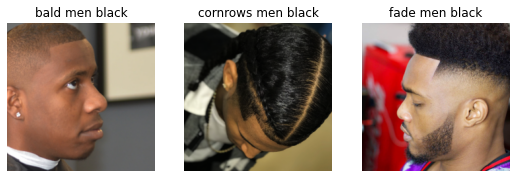

In [31]:
# view training batch sample #
dls.train.show_batch(nrows=1, ncols=3)

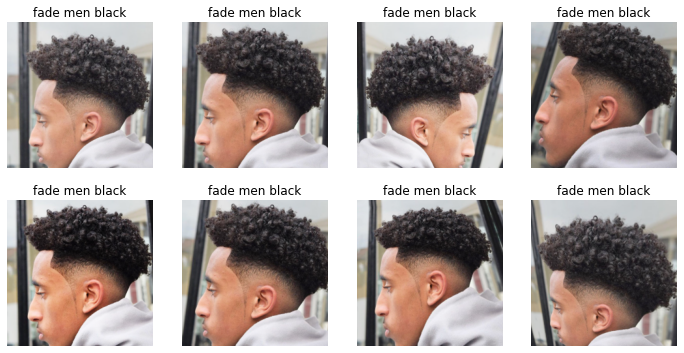

In [34]:
# show augmented train data unique #
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [35]:
# create learner #
learn = cnn_learner(dls, resnet18)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [36]:
# the loss fuction fastai chooses #
learn.loss_func

FlattenedLoss of BCEWithLogitsLoss()

In [37]:
# one batch of activations shape #
x,y = to_cpu(dls.train.one_batch())
activs = learn.model(x)
activs.shape, y.shape

(torch.Size([64, 3]), torch.Size([64, 3]))

In [38]:
# init activations #
activs[0]

TensorBase([-3.1606,  0.4152, -3.1690], grad_fn=<AliasBackward0>)

In [39]:
# fit model with threshold = 0.5 #
learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi, thresh=0.5))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.960074,0.701485,0.638418,00:14
1,0.771078,0.472186,0.810735,00:15
2,0.657501,0.407455,0.833333,00:14
3,0.572461,0.379349,0.867232,00:14


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.319617,0.409251,0.853107,00:14
1,0.297683,0.356557,0.870057,00:14
2,0.253378,0.358048,0.878531,00:15


**finding best threshold**

In [40]:
# using predictions #
preds,targs = learn.get_preds()
accuracy_multi(preds, targs, thresh=0.9, sigmoid=False)

TensorBase(0.8898)

([<matplotlib.axis.XTick at 0x7efc02662b50>,
 <a list of 11 Text major ticklabel objects>)

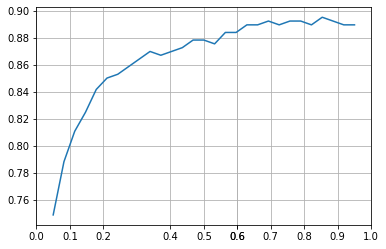

In [42]:
# plot thresholds #
xs = torch.linspace(0.05,0.95,29)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs,accs)
plt.grid()
plt.xticks([0,0.1,0.2,0.6,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

Try thresh 0.8

In [43]:
# fit model with threshold = 0.8 #
learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi, thresh=0.8))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.926733,0.760979,0.717514,00:15
1,0.778865,0.482338,0.844633,00:14
2,0.663693,0.384096,0.867232,00:14
3,0.578372,0.353702,0.887006,00:14


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.296247,0.342774,0.898305,00:14
1,0.263366,0.384666,0.892655,00:15
2,0.237527,0.374204,0.906780,00:15


**Model Improved**

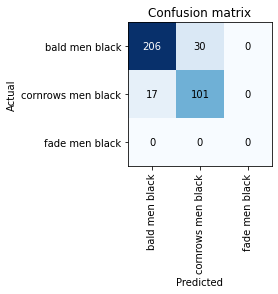

In [44]:
# Confussion matrix #
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

model confusses bald men with cornrows men

,target,predicted,probabilities,loss
0,fade men black,bald men black,"TensorBase([1.0000e+00, 1.8809e-05, 1.1302e-03])",6.5413737297058105
1,cornrows men black,bald men black,"TensorBase([9.3513e-01, 7.9856e-04, 3.5708e-01])",3.436594009399414
2,cornrows men black,bald men black;fade men black,"TensorBase([0.5624, 0.0040, 0.7630])",2.5982937812805176
3,bald men black,cornrows men black,"TensorBase([0.0616, 0.9883, 0.0415])",2.4253201484680176
4,fade men black,bald men black,"TensorBase([0.9638, 0.0014, 0.0519])",2.093183994293213


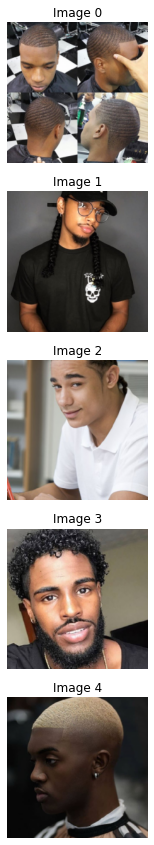

In [45]:
# show top losses #
interp.plot_top_losses(5, nrows=5)

**Data cleaning**

In [48]:
from fastai.vision.widgets import *

In [49]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [50]:
# # removing images #
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

**export model**

In [53]:
learn.export(fname="multi_hair_classiffier.pkl")

In [54]:
# show model location #
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('multi_hair_classiffier.pkl')]

**Reload model as inference**

In [55]:
learn_inf = load_learner(path/'multi_hair_classiffier.pkl')

**make preddictions**

In [60]:
# test image paths #
car = "/content/Red-Sport-Car.jpg"
goat = "/content/boer-goat-2273921_1920.jpg"
leo_thomas_hair= "/content/leon-thomas-iii-hairstyle-0.jpg"
dreads = "/content/b533a6faadcd88d1d760de283587bb37.jpg"

In [61]:
learn.predict(leo_thomas_hair)

((#1) ['bald men black'],
 TensorBase([ True, False, False]),
 TensorBase([0.9996, 0.0011, 0.1055]))

In [62]:
learn.predict(dreads)

((#1) ['bald men black'],
 TensorBase([ True, False, False]),
 TensorBase([0.5508, 0.0014, 0.4399]))

In [57]:
learn.predict(car)

((#2) ['cornrows men black','fade men black'],
 TensorBase([False,  True,  True]),
 TensorBase([0.0528, 0.6819, 0.8552]))

In [58]:
learn.predict(goat)

((#1) ['bald men black'],
 TensorBase([ True, False, False]),
 TensorBase([0.9423, 0.0076, 0.0462]))

I need to make a fouth class for if the image is not a haircut

# Second try